# A Simple Example of Learning
----------------------------

Simple learning example to learn weights for a simple sigmoid network using the following guidelines.

- Output is winner takes all.
- For learning, increment weights from active pixels to the correct class.
- And decrement the weights from active pixels to whatever class the network guesses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, gzip
%matplotlib inline

For this example, we pick a random subset of images from the MNIST training set.  

In [2]:
# load the data
f = gzip.open('data/mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='iso-8859-1')
f.close()
train_input, train_output = train_set

In [3]:
print (train_input.shape)
print (train_output.shape)

(50000, 784)
(50000,)


In [4]:
# pick NUM_ITEMS from each class at random from train_set
NUM_ITEMS = 1

selected_image_indexes = np.array([], dtype=int)
for digit in range(0, 10):
    digit_indexes = np.where(train_output == digit)[0]
    print(len(digit_indexes))
    candidate_image_indexes = np.random.choice(digit_indexes, NUM_ITEMS)
    
    selected_image_indexes = np.concatenate((selected_image_indexes, candidate_image_indexes))
#print selected_image_indexes
#print train_output[selected_image_indexes]
np.random.shuffle(selected_image_indexes)
my_train_input = train_input[selected_image_indexes]
my_train_output = train_output[selected_image_indexes]

4932
5678
4968
5101
4859
4506
4951
5175
4842
4988


[1 2 7 0 3 5 6 4 8 9]


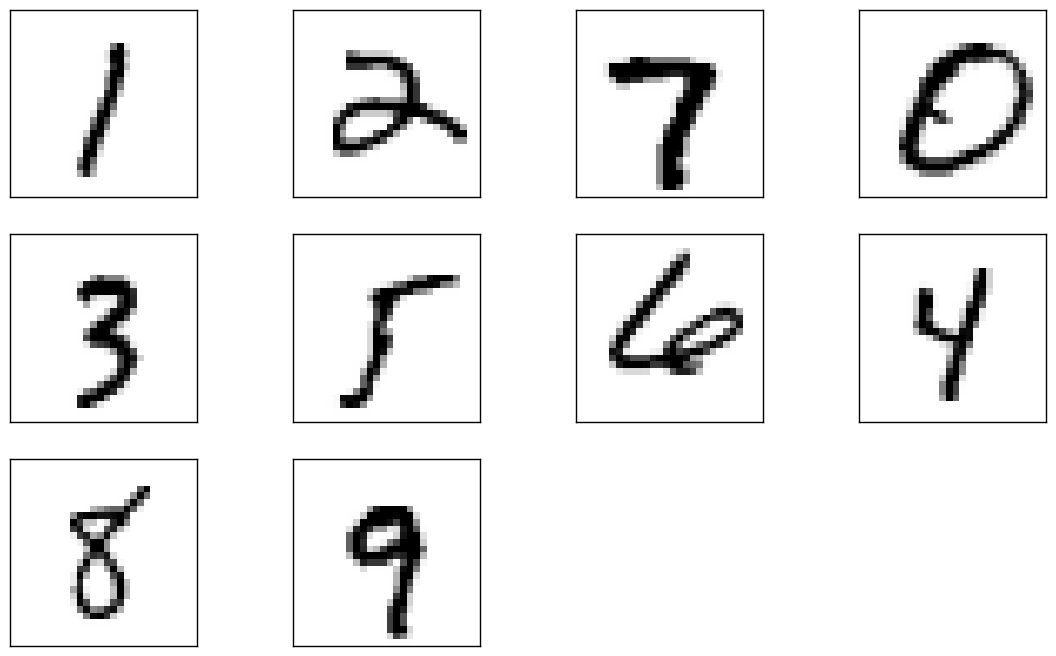

In [5]:
# display the images we randomly selected
# NOTE: don't try this with a large number of items
plt.figure(figsize=(14, 14))
    
for i in range(10):
    img = my_train_input[i,:]
    img = img.reshape(28, 28)
    plt.subplot(5, 4, i+1) ##n??

    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None')
    plt.xticks([])
    plt.yticks([])
print (my_train_output)

Generate an initial set of weights at random.  We will generate initially random weights from a normal distribution.
We need 10 weights to go from each of the pixels of input, thus we need $784 x 10$ set of weights.  We can do this easily
in python:

In [6]:
weights = np.random.randn(784, 10)
print (weights.shape)

(784, 10)


To display the weight matrices as in the lecture slides, we do basically the same thing we just did to display our images.

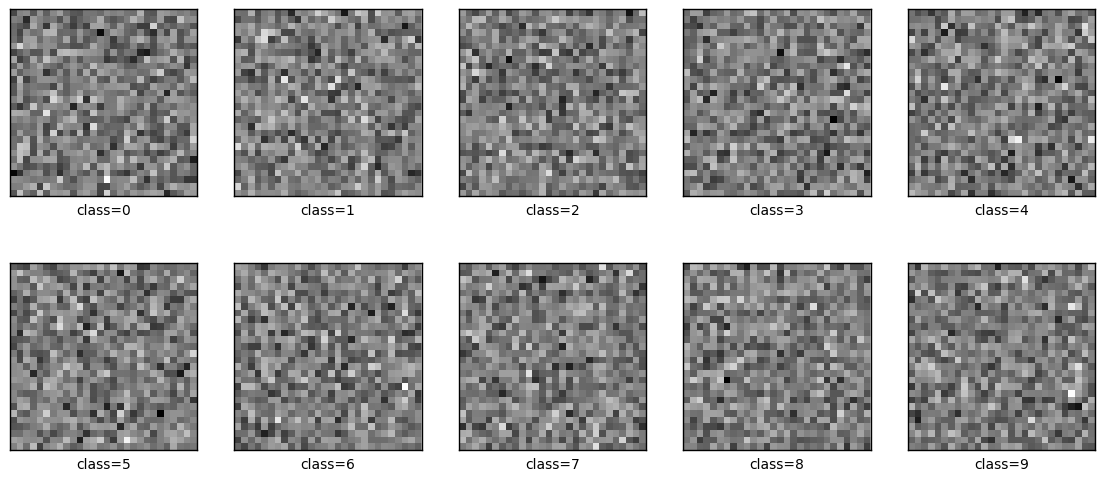

In [7]:
# visualize the weights we just generated
plt.figure(figsize=(14, 6))
for i in range(10):
    img = weights[:,i]
    plt.subplot(2, 5, i+1)
    img = img.reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None', 
               vmin=weights.min(), vmax=weights.max())
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('class=%d' % i)

Now for the learning, we need to present each of our selected images to the network, and compute which output
is the winner.  Then we need to increment weights from active pixels to the correct class, and decrement the
weights to the class the network guessed.  Lets show doing this for just 1 image by hand
first.

In [8]:
# define sigmoid activation function we are using
def sigmoid(z):
    """Implement the sigmoid activation function for neural units"""
    return 1.0 / (1.0 + np.exp(-z))


In [9]:
img_no = 5
img = my_train_input[img_no,:]
    
# determine actual output of network and expected output
output = sigmoid(np.dot(img, weights))
actual_output = np.where(output == output.max())[0][0]
print ("Actual output:", actual_output)
expected_output = my_train_output[img_no]
print ("Expected output:", expected_output)

LEARNING_DELTA = 0.01

# increase weights from active pixels to the correct expected output
active_pixels = (img > 0.5)
weights[active_pixels, expected_output] += LEARNING_DELTA
    
# decrease weights to the actual output
weights[active_pixels, actual_output] -= LEARNING_DELTA


Actual output: 6
Expected output: 5


Now the only thing left to do is to run the previous block for every input image we have:

Got this number correct:  1 out of 10 training images


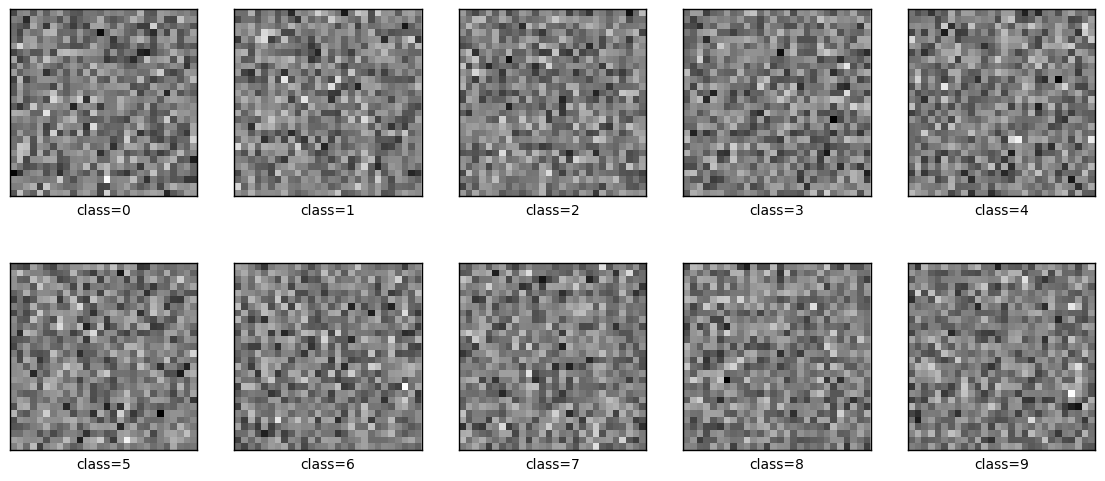

In [10]:
LEARNING_DELTA = 0.01
num_correct = 0
for img_no in range(my_train_output.shape[0]):
    img = my_train_input[img_no,:]
    
    # determine actual output of network and expected output
    output = sigmoid(np.dot(img, weights))
    actual_output = np.where(output == output.max())[0][0]
    expected_output = my_train_output[img_no]
    
    # increase weights from active pixels to the correct expected output
    active_pixels = (img > 0.5)
    weights[active_pixels, expected_output] += LEARNING_DELTA
    
    # decrease weights to the actual output
    if actual_output != expected_output:
        weights[active_pixels, actual_output] -= LEARNING_DELTA
    
    if actual_output == expected_output:
        num_correct += 1
        

# display results
print ("Got this number correct: ", num_correct, "out of",  my_train_output.shape[0], "training images")

# visualize the current values of the weights
plt.figure(figsize=(14, 6))
for i in range(10):
    img = weights[:,i]
    plt.subplot(2, 5, i+1)
    img = img.reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None', vmin=weights.min(), vmax=weights.max())
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('class=%d' % i)

In [16]:
output.shape

(10,)

Ok not the only thing, only doing 1 pass of training won't effect the weights very much, we need to repeat all of the above
for many cycles:

In [11]:
# pick NUM_ITEMS from each class at random from train_set
NUM_ITEMS = 5

selected_image_indexes = np.array([], dtype=int)
for digit in range(0, 10):
    digit_indexes = np.where(train_output == digit)[0]
    candidate_image_indexes = np.random.choice(digit_indexes, NUM_ITEMS, replace=False)
    selected_image_indexes = np.concatenate((selected_image_indexes, candidate_image_indexes))
#print selected_image_indexes
#print train_output[selected_image_indexes]
np.random.shuffle(selected_image_indexes)
my_train_input = train_input[selected_image_indexes]
my_train_output = train_output[selected_image_indexes]

In [13]:
weights = np.random.normal(0.0, 0.1, (784, 10))
#weights = weights / weights.sum()
print (weights.shape)
print (weights.sum(), weights.min(), weights.max())

(784, 10)
-2.07816287682 -0.353923355179 0.347462633971


In [15]:
NUM_TRAINING_CYCLES = 100
LEARNING_DELTA = 0.1

for cycle in range(NUM_TRAINING_CYCLES):
    num_correct = 0
    num_items = my_train_output.shape[0]
    correct_classes = np.zeros(10);
    img_nos = range(num_items)
    np.random.shuffle(img_nos)
    for img_no in img_nos:
        img = my_train_input[img_no,:]
        
        # determine actual output of network and expected output
        output = sigmoid(np.dot(img, weights))
        actual_output = np.random.choice(np.where(output == output.max())[0])
        expected_output = my_train_output[img_no]
        #print img_no
        #print output
        #print actual_output, expected_output
        #print ""
        
        # increase weights from active pixels to the correct expected output
        # decrease weights to the actual output
        active_pixels = (img > 0.50)
        weights[active_pixels, expected_output] +=  LEARNING_DELTA
        #if actual_output != expected_output:
        weights[active_pixels, actual_output] -= LEARNING_DELTA
            
            
        # keep track of how we're doing
        if actual_output == expected_output:    
            num_correct += 1
            correct_classes[actual_output] += 1

        #if expected_output != actual_output:
        #    print cycle, img_no, expected_output, actual_output
        
    # normalize weights
    #weights = weights / weights.sum()
    
    # display results
    if cycle % 10 == 0:
        pct_correct = float(num_correct) / float(num_items) * 100.0
        print ("Cycle: %d  Got this number correct: %d out of %d training images (%0.2f %%correct)" % (cycle, num_correct, num_items, pct_correct))
        print ("    min weight: ", weights.min(), "max weight:", weights.max(), "weight sum:", weights.sum())
        print ("    correct classes:", correct_classes)
        
# visualize the current values of the weights
plt.figure(figsize=(14, 6))
for i in range(10):
    img = weights[:,i]
    plt.subplot(2, 5, i+1)
    img = img.reshape(28, 28)
    print (i, img.sum(), img.min(), img.max())
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None', vmin=weights.min(), vmax=weights.max())
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('class=%d' % i)
    plt.colorbar()

TypeError: 'range' object does not support item assignment

In [ ]:
# visualize the current values of the weights
plt.figure(figsize=(14, 6))
for i in range(10):
    img = weights[:,i]
    plt.subplot(2, 5, i+1)
    img = img.reshape(28, 28)
    #print i, img.sum(), img.min(), img.max()
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None', vmin=weights.min(), vmax=weights.max())
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('class=%d' % i)
    plt.colorbar()

Evaluating the Performance
--------------------------

We can get the network to correctly classify a large number of the digits, even using a fairly large training set, by
using one variation of the learning rule (only change weights when the network gets the answer wrong.  However, you
should not get too excited by this performance.  The network can do much worse on images it has not seen before.

For example.  Train the previous network for good performance as you like.  Then run the following to see how well
the network does on the set of test cases in the MNIST database.

In [ ]:
test_input, test_output = test_set
print test_input.shape
print test_output.shape

In [ ]:
num_correct = 0
num_tests = test_output.shape[0]
correct_classes = np.zeros(10);
for img_no in range(num_tests):
    img = test_input[img_no,:]
    
    # determine actual output of network and expected output
    output = sigmoid(np.dot(img, weights))
    actual_output = np.random.choice(np.where(output == output.max())[0])
    expected_output = test_output[img_no]

    if expected_output == actual_output:
        num_correct += 1
        correct_classes[actual_output] += 1

pct_correct = float(num_correct) / float(num_tests) * 100.0
print "Number of correct on test set: %d / %d (%0.2f %%correct)" % (num_correct, test_output.shape[0], pct_correct)
print "Correct classifications for each image class:"
print correct_classes